<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week4.do.txt --no_mako -->
<!-- dom:TITLE: February 13-17: Advanced machine learning and data analysis for the physical sciences -->

# February 13-17: Advanced machine learning and data analysis for the physical sciences
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, East Lansing, Michigan, USA

Date: **Feb 14, 2023**

Copyright 1999-2023, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license

## Plans for February 13-17

* Discussion of project paths

* Convolutional  Neural Networks.

* Reading recommendations:

a. For neural networks we recommend Goodfellow et al chapters 6 and 7. For CNNs, see Goodfellow et al chapter 9. See also chapter 11 and 12 on practicalities and applications

b. Reading suggestions for implementation of CNNs: [Aurelien Geron's chapter 13](https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/TensorflowML.pdf).

**Excellent lectures on CNNs and Neural Networks.**

* [Video on Deep Learning](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

* [Video  on Convolutional Neural Networks from MIT](https://www.youtube.com/watch?v=iaSUYvmCekI&ab_channel=AlexanderAmini)

* [Video on CNNs from Stanford](https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk&index=6&ab_channel=StanfordUniversitySchoolofEngineering)

m

**And Lecture material on CNNs.**

* [Lectures from IN5400 spring 2019](https://www.uio.no/studier/emner/matnat/ifi/IN5400/v19/material/week5/in5400_2019_week5_convolutional_nerual_networks.pdf)

* [Lectures from IN5400 spring 2021](https://www.uio.no/studier/emner/matnat/ifi/IN5400/v21/lecture-slides/in5400_2021_w5_lecture_convolutions.pdf)

* [See also Michael Nielsen's Lectures](http://neuralnetworksanddeeplearning.com/chap6.html)

## First project

### Possible paths for project 1

We discuss here several paths as well as data sets for the first project (or as parts of a larger project)

1. The computational path: Here we propose a path where you develop your own code for a convolutional or eventually recurrent neural network and apply this to data selects of your own selection. The code should be object oriented and flexible allowing for eventual extensions by including different Loss/Cost functions and other functionalities. Feel free to select data sets from those suggested below here. This code can also be extended upon by adding for example autoencoders. You can compare your own codes with implementations using TensorFlow(Keras)/PyTorch or other libraries.

2. The differential equation path: Here we propose a set of differential equations (ordinary and/or partial) to be solved first using neural networks (using either your own code or TensorFlow/Pytorch or similar libraries). Thereafter we plan to extend the set of methods for solving these equations to recurrent neural networks and autoencoders (AE) and/or Generalized Adversarial Networks (GANs). All these approaches can be expanded into one large project. This project can also be extended into including [Physics informed machine learning](https://github.com/maziarraissi/PINNs). Here we can discuss neural networks that are trained to solve supervised learning tasks while respecting any given law of physics described by general nonlinear partial differential equations. 

3. The application path: Here you can use the most relevant method(s) (say convolutional neural networks for images) and apply this(these) to data sets relevant for your own research.

4. The Gaussian processes/Bayesian statistics path: [Kernel regression (Gaussian processes) and Bayesian statistics](https://jenfb.github.io/bkmr/overview.html) are  popular tools in the machine learning literature. The main idea behind these approaches is to flexibly model the relationship between a large number of variables and a particular outcome (dependent variable). This can form a second part of a project where for example standard Kernel regression methods are used on a specific data set. Alternatively, participants can opt to work on a large project relevant for their own research using gaussian processes and/or Bayesian machine Learning. 

You can propose own data sets that relate to your research interests or just use existing data sets from say
1. [Kaggle](https://www.kaggle.com/datasets) 

2. The [University of California at Irvine (UCI) with its  machine learning repository](https://archive.ics.uci.edu/ml/index.php).

3. For the differential equation problems, you can generate your own datasets, as described below.

4. If possible, you should link the data sets with existing research and analyses thereof. Scientific articles which have used Machine Learning algorithms to analyze the data are highly welcome. Perhaps you can improve previous analyses and even publish a new article? 

5. A critical assessment of the methods with ditto perspectives and recommendations is also something you need to include. For those of you familiar with report writing, the layouts discussed in for example [FYS-STK4155](https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md).

## Solving  differential equations with neural networks

Here we describe the possible differential equations we can study
first with neural networks and thereafter with recurrent neural
networks and/or AE and/or GANs.

The differential equations are given by the so-called [Lorenz attractor model](https://encyclopediaofmath.org/index.php?title=Lorenz_attractor), and read

$$
\frac{dx}{dt}=\sigma\left(y-x\right),
$$

where $\sigma =10$ is a constant

$$
\frac{dy}{dt}= x\left(\rho-z\right)-y,
$$

with $\rho=28$ and

$$
\frac{dz}{dt}=xy-\beta z
$$

with $\beta=8/3$ as our final constant.

The following function is a
simple function which sets up the solution using the ordinary
differential library which follows **NumPy**. Here we have fixed the
time sted $\Delta t=0.01$ and the final time $t_f=8$.

The program sets $100$ random initial values and produces inputs and outputs for a neural network calculations.
The inputs are given by the values of the array $\boldsymbol{x}$ (which contains $x,y,z$ as functions of time) for the time step $\boldsymbol{x}_t$.
The other array defined by $\boldsymbol{x}_{t+1}$ contains the outputs (or targets) which we want the neural network to reproduce.

In [1]:
%matplotlib inline

# Common imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


# Selection of parameter values and setting array for time
dt =0.01; tfinal = 8
t = np.arange(0,tfinal+dt, dt)
beta =8.0/3.0; rho = 28.0; sigma = 10.0

# define the inputs and outputs for the neural networks
nninput = np.zeros((100*len(t)-1,3))
nnoutput = np.zeros((100*len(t)-1,3))
# Define the equations to integrate
def lorenz_derivative(xyz, t0, sigma=sigma,beta=beta,rho=rho):
    x, y, z = xyz
    return [sigma*(x-y), x*(rho-z)-y, x*y-beta*z]

# generate 100 random initial values
x0 = -15.0+30.0*np.random.random((100,3))

# Use odeint functionality by sending in derivative function
# Feel free to change the choice of integrator
x_t = np.asarray([odeint(lorenz_derivative, x0_j, t) 
                  for x0_j in x0])

# define the inputs and outputs for the neural networks
for j in range(100):
    nninput[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nnoutput[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]

The input and output variables are those we will start trying our
network with. Your first taks is to set up a neural code (either using
your own code or TensorFlow/PyTorch or similar libraries)) and use the
above data to a prediction for the time evolution of Lorenz system for
various values of the randomly chosen initial values.  Study the
dependence of the fit as function of the architecture of the network
(number of nodes, hidden layers and types of activation functions) and
various regularization schemes and optimization methods like standard
gradient descent with momentum, stochastic gradient descent with
batches and with and without momentum and various schedulers for the
learning rate.

Feel free to change the above differential equations. As an example,
consider the following harmonic oscillator equations solved with the
Runge-Kutta to fourth order method. This is a one-dimensional problem
and it produces a position $x_t$ and velocity $v_t$. You could now try
to fit both the velocities and positions using much of the same recipe
as for Lorenz attractor.  You will find it convenient to analyze one
set of initial conditions first. The code is included here.

This code is an example code that solves Newton's equations of motion
with a given force and produces an output which in turn can be used to
train a neural network

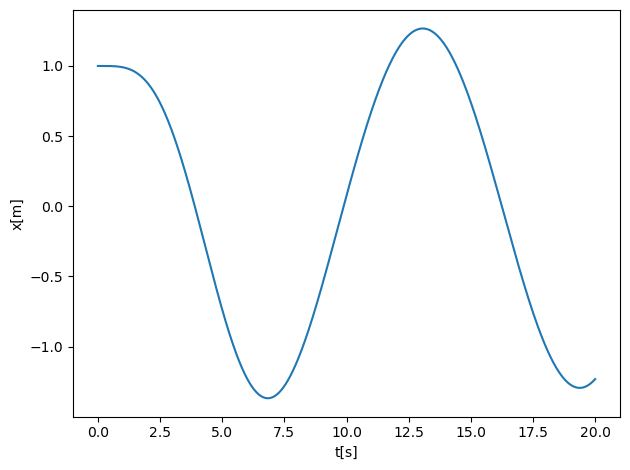

In [1]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def SpringForce(v,x,t):
#   note here that we have divided by mass and we return the acceleration
    return  -2*gamma*v-x+Ftilde*cos(t*Omegatilde)


def RK4(v,x,t,n,Force):
    for i in range(n-1):
# Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT*Force(v[i],x[i],t[i])
# Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT*Force(vv,xx,t[i]+DeltaT)
# Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.
        t[i+1] = t[i] + DeltaT


# Main part begins here

DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions (can change to more than one dim)
x0 =  1.0 
v0 = 0.0
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using Euler's method
# Note that we define the force function as a SpringForce
RK4(v,x,t,n,SpringForce)

# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('t[s]')
ax.plot(t, x)
fig.tight_layout()
save_fig("ForcedBlockRK4")
plt.show()

The next step is to include recurrent neural networks. These will be discussed in connection with coming lectures.

## Convolutional Neural Networks (recognizing images)

Convolutional neural networks (CNNs) were developed during the last
decade of the previous century, with a focus on character recognition
tasks. Nowadays, CNNs are a central element in the spectacular success
of deep learning methods. The success in for example image
classifications have made them a central tool for most machine
learning practitioners.

CNNs are very similar to ordinary Neural Networks.
They are made up of neurons that have learnable weights and
biases. Each neuron receives some inputs, performs a dot product and
optionally follows it with a non-linearity. The whole network still
expresses a single differentiable score function: from the raw image
pixels on one end to class scores at the other. And they still have a
loss function (for example Softmax) on the last (fully-connected) layer
and all the tips/tricks we developed for learning regular Neural
Networks still apply (back propagation, gradient descent etc etc).

## What is the Difference

**CNN architectures make the explicit assumption that
the inputs are images, which allows us to encode certain properties
into the architecture. These then make the forward function more
efficient to implement and vastly reduce the amount of parameters in
the network.**

Here we provide only a superficial overview, for the more interested, we recommend highly the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/).

Another good read is the article here <https://arxiv.org/pdf/1603.07285.pdf>.

## Neural Networks vs CNNs

Neural networks are defined as **affine transformations**, that is 
a vector is received as input and is multiplied with a matrix of so-called weights (our unknown paramters) to produce an
output (to which a bias vector is usually added before passing the result
through a nonlinear activation function). This is applicable to any type of input, be it an
image, a sound clip or an unordered collection of features: whatever their
dimensionality, their representation can always be flattened into a vector
before the transformation.

## Why CNNS for images, sound files, medical images from CT scans etc?

However, when we consider images, sound clips and many other similar kinds of data, these data  have an intrinsic
structure. More formally, they share these important properties:
* They are stored as multi-dimensional arrays (think of the pixels of a figure) .

* They feature one or more axes for which ordering matters (e.g., width and height axes for an image, time axis for a sound clip).

* One axis, called the channel axis, is used to access different views of the data (e.g., the red, green and blue channels of a color image, or the left and right channels of a stereo audio track).

These properties are not exploited when an affine transformation is applied; in
fact, all the axes are treated in the same way and the topological information
is not taken into account. Still, taking advantage of the implicit structure of
the data may prove very handy in solving some tasks, like computer vision and
speech recognition, and in these cases it would be best to preserve it. This is
where discrete convolutions come into play.

A discrete convolution is a linear transformation that preserves this notion of
ordering. It is sparse (only a few input units contribute to a given output
unit) and reuses parameters (the same weights are applied to multiple locations
in the input).

## Regular NNs don’t scale well to full images

As an example, consider
an image of size $32\times 32\times 3$ (32 wide, 32 high, 3 color channels), so a
single fully-connected neuron in a first hidden layer of a regular
Neural Network would have $32\times 32\times 3 = 3072$ weights. This amount still
seems manageable, but clearly this fully-connected structure does not
scale to larger images. For example, an image of more respectable
size, say $200\times 200\times 3$, would lead to neurons that have 
$200\times 200\times 3 = 120,000$ weights. 

We could have
several such neurons, and the parameters would add up quickly! Clearly,
this full connectivity is wasteful and the huge number of parameters
would quickly lead to possible overfitting.

<!-- dom:FIGURE: [figslides/nn.jpeg, width=500 frac=0.6]  A regular 3-layer Neural Network. -->
<!-- begin figure -->

<img src="figslides/nn.jpeg" width="500"><p style="font-size: 0.9em"><i>Figure 1: A regular 3-layer Neural Network.</i></p>
<!-- end figure -->

## 3D volumes of neurons

Convolutional Neural Networks take advantage of the fact that the
input consists of images and they constrain the architecture in a more
sensible way. 

In particular, unlike a regular Neural Network, the
layers of a CNN have neurons arranged in 3 dimensions: width,
height, depth. (Note that the word depth here refers to the third
dimension of an activation volume, not to the depth of a full Neural
Network, which can refer to the total number of layers in a network.)

To understand it better, the above example of an image 
with an input volume of
activations has dimensions $32\times 32\times 3$ (width, height,
depth respectively). 

The neurons in a layer will
only be connected to a small region of the layer before it, instead of
all of the neurons in a fully-connected manner. Moreover, the final
output layer could  for this specific image have dimensions $1\times 1 \times 10$, 
because by the
end of the CNN architecture we will reduce the full image into a
single vector of class scores, arranged along the depth
dimension. 

<!-- dom:FIGURE: [figslides/cnn.jpeg, width=500 frac=0.6]  A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels). -->
<!-- begin figure -->

<img src="figslides/cnn.jpeg" width="500"><p style="font-size: 0.9em"><i>Figure 1: A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).</i></p>
<!-- end figure -->

## Layers used to build CNNs

A simple CNN is a sequence of layers, and every layer of a CNN
transforms one volume of activations to another through a
differentiable function. We use three main types of layers to build
CNN architectures: Convolutional Layer, Pooling Layer, and
Fully-Connected Layer (exactly as seen in regular Neural Networks). We
will stack these layers to form a full CNN architecture.

A simple CNN for image classification could have the architecture:

* **INPUT** ($32\times 32 \times 3$) will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.

* **CONV** (convolutional )layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as $[32\times 32\times 12]$ if we decided to use 12 filters.

* **RELU** layer will apply an elementwise activation function, such as the $max(0,x)$ thresholding at zero. This leaves the size of the volume unchanged ($[32\times 32\times 12]$).

* **POOL** (pooling) layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as $[16\times 16\times 12]$.

* **FC** (i.e. fully-connected) layer will compute the class scores, resulting in volume of size $[1\times 1\times 10]$, where each of the 10 numbers correspond to a class score, such as among the 10 categories of the MNIST images we considered above . As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## Transforming images

CNNs transform the original image layer by layer from the original
pixel values to the final class scores. 

Observe that some layers contain
parameters and other don’t. In particular, the CNN layers perform
transformations that are a function of not only the activations in the
input volume, but also of the parameters (the weights and biases of
the neurons). On the other hand, the RELU/POOL layers will implement a
fixed function. The parameters in the CONV/FC layers will be trained
with gradient descent so that the class scores that the CNN computes
are consistent with the labels in the training set for each image.

## CNNs in brief

In summary:

* A CNN architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)

* There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)

* Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function

* Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)

* Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)

For more material on convolutional networks, we strongly recommend
the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/) which is taught at Stanford University (consistently ranked as one of the top computer science programs in the world). [Michael Nielsen's book is a must read, in particular chapter 6 which deals with CNNs](http://neuralnetworksanddeeplearning.com/chap6.html).

The textbook by Goodfellow et al, see chapter 9 contains an in depth discussion as well.

## Key Idea

A dense neural network is representd by an affine operation (like matrix-matrix multiplication) where all parameters are included.

The key idea in CNNs for say imaging is that in images neighbor pixels tend to be related! So we connect
only neighboring neurons in the input instead of connecting all with the first hidden layer.

We say we perform a filtering (convolution is the mathematical operation).

## Mathematics of CNNs

The mathematics of CNNs is based on the mathematical operation of
**convolution**.  In mathematics (in particular in functional analysis),
convolution is represented by mathematical operation (integration,
summation etc) on two function in order to produce a third function
that expresses how the shape of one gets modified by the other.
Convolution has a plethora of applications in a variety of disciplines, spanning from statistics to signal processing, computer vision, solutions of differential equations,linear algebra, engineering,  and yes, machine learning.

Mathematically, convolution is defined as follows (one-dimensional example):
Let us define a continuous function $y(t)$ given by

$$
y(t) = \int x(a) w(t-a) da,
$$

where $x(a)$ represents a so-called input and $w(t-a)$ is normally called the weight function or kernel.

The above integral is written in  a more compact form as

$$
y(t) = \left(x * w\right)(t).
$$

The discretized version reads

$$
y(t) = \sum_{a=-\infty}^{a=\infty}x(a)w(t-a).
$$

Computing the inverse of the above convolution operations is known as deconvolution.

How can we use this? And what does it mean? Let us study some familiar examples first.

## Convolution Examples: Polynomial multiplication

We have already met such an example in project 1 when we tried to set
up the design matrix for a two-dimensional function. This was an
example of polynomial multiplication.  Let us recast such a problem in terms of the convolution operation.
Let us look a the following polynomials to second and third order, respectively:

$$
p(t) = \alpha_0+\alpha_1 t+\alpha_2 t^2,
$$

and

$$
s(t) = \beta_0+\beta_1 t+\beta_2 t^2+\beta_3 t^3.
$$

The polynomial multiplication gives us a new polynomial of degree $5$

$$
z(t) = \delta_0+\delta_1 t+\delta_2 t^2+\delta_3 t^3+\delta_4 t^4+\delta_5 t^5.
$$

## Efficient Polynomial Multiplication

Computing polynomial products can be implemented efficiently if we rewrite the more brute force multiplications using convolution.
We note first that the new coefficients are given as

$$
\begin{split}
\delta_0=&\alpha_0\beta_0\\
\delta_1=&\alpha_1\beta_0+\alpha_1\beta_0\\
\delta_2=&\alpha_0\beta_2+\alpha_1\beta_1+\alpha_2\beta_0\\
\delta_3=&\alpha_1\beta_2+\alpha_2\beta_1+\alpha_0\beta_3\\
\delta_4=&\alpha_2\beta_2+\alpha_1\beta_3\\
\delta_5=&\alpha_2\beta_3.\\
\end{split}
$$

We note that $\alpha_i=0$ except for $i\in \left\{0,1,2\right\}$ and $\beta_i=0$ except for $i\in\left\{0,1,2,3\right\}$.

We can then rewrite the coefficients $\delta_j$ using a discrete convolution as

$$
\delta_j = \sum_{i=-\infty}^{i=\infty}\alpha_i\beta_{j-i}=(\alpha * \beta)_j,
$$

or as a double sum with restriction $l=i+j$

$$
\delta_l = \sum_{ij}\alpha_i\beta_{j}.
$$

Do you see a potential drawback with these equations?

## A more efficient way of coding the above Convolution

Since we only have a finite number of $\alpha$ and $\beta$ values
which are non-zero, we can rewrite the above convolution expressions
as a matrix-vector multiplication

$$
\boldsymbol{\delta}=\begin{bmatrix}\alpha_0 & 0 & 0 & 0 \\
                            \alpha_1 & \alpha_0 & 0 & 0 \\
			    \alpha_2 & \alpha_1 & \alpha_0 & 0 \\
			    0 & \alpha_2 & \alpha_1 & \alpha_0 \\
			    0 & 0 & \alpha_2 & \alpha_1 \\
			    0 & 0 & 0 & \alpha_2
			    \end{bmatrix}\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3\end{bmatrix}.
$$

The process is commutative and we can easily see that we can rewrite the multiplication in terms of  a matrix holding $\beta$ and a vector holding $\alpha$.
In this case we have

$$
\boldsymbol{\delta}=\begin{bmatrix}\beta_0 & 0 & 0  \\
                            \beta_1 & \beta_0 & 0  \\
			    \beta_2 & \beta_1 & \beta_0  \\
			    \beta_3 & \beta_2 & \beta_1 \\
			    0 & \beta_3 & \beta_2 \\
			    0 & 0 & \beta_3
			    \end{bmatrix}\begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \alpha_2\end{bmatrix}.
$$

Note that the use of these  matrices is for mathematical purposes only  and not implementation purposes.
When implementing the above equation we do not encode (and allocate memory) the matrices explicitely.
We rather code the convolutions in the minimal memory footprint that they require.

Does the number of floating point operations change here when we use the commutative property?

## Convolution Examples: Principle of Superposition and Periodic Forces (Fourier Transforms)

For problems with so-called harmonic oscillations, given by for example the following differential equation

$$
m\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=F(t),
$$

where $F(t)$ is an applied external force acting on the system (often called a driving force), one can use the theory of Fourier transformations to find the solutions of this type of equations.

If one has several driving forces, $F(t)=\sum_n F_n(t)$, one can find
the particular solution to each $F_n$, $x_{pn}(t)$, and the particular
solution for the entire driving force is then given by a series like

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
x_p(t)=\sum_nx_{pn}(t).
\label{_auto1} \tag{1}
\end{equation}
$$

## Principle of Superposition

This is known as the principle of superposition. It only applies when
the homogenous equation is linear. If there were an anharmonic term
such as $x^3$ in the homogenous equation, then when one summed various
solutions, $x=(\sum_n x_n)^2$, one would get cross
terms. Superposition is especially useful when $F(t)$ can be written
as a sum of sinusoidal terms, because the solutions for each
sinusoidal (sine or cosine)  term is analytic. 

Driving forces are often periodic, even when they are not
sinusoidal. Periodicity implies that for some time $\tau$

$$
\begin{eqnarray}
F(t+\tau)=F(t). 
\end{eqnarray}
$$

One example of a non-sinusoidal periodic force is a square wave. Many
components in electric circuits are non-linear, e.g. diodes, which
makes many wave forms non-sinusoidal even when the circuits are being
driven by purely sinusoidal sources.

## Simple Code Example

The code here shows a typical example of such a square wave generated using the functionality included in the **scipy** Python package. We have used a period of $\tau=0.2$.

In [3]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t)
plt.plot(t, SqrSignal)
plt.ylim(-0.5, 2.5)
plt.show()

For the sinusoidal example the
period is $\tau=2\pi/\omega$. However, higher harmonics can also
satisfy the periodicity requirement. In general, any force that
satisfies the periodicity requirement can be expressed as a sum over
harmonics,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
F(t)=\frac{f_0}{2}+\sum_{n>0} f_n\cos(2n\pi t/\tau)+g_n\sin(2n\pi t/\tau).
\label{_auto2} \tag{2}
\end{equation}
$$

## Wrapping up Fourier transforms

We can write down the answer for
$x_{pn}(t)$, by substituting $f_n/m$ or $g_n/m$ for $F_0/m$. By
writing each factor $2n\pi t/\tau$ as $n\omega t$, with $\omega\equiv
2\pi/\tau$,

<!-- Equation labels as ordinary links -->
<div id="eq:fourierdef1"></div>

$$
\begin{equation}
\label{eq:fourierdef1} \tag{3}
F(t)=\frac{f_0}{2}+\sum_{n>0}f_n\cos(n\omega t)+g_n\sin(n\omega t).
\end{equation}
$$

The solutions for $x(t)$ then come from replacing $\omega$ with
$n\omega$ for each term in the particular solution,

$$
\begin{eqnarray}
x_p(t)&=&\frac{f_0}{2k}+\sum_{n>0} \alpha_n\cos(n\omega t-\delta_n)+\beta_n\sin(n\omega t-\delta_n),\\
\nonumber
\alpha_n&=&\frac{f_n/m}{\sqrt{((n\omega)^2-\omega_0^2)+4\beta^2n^2\omega^2}},\\
\nonumber
\beta_n&=&\frac{g_n/m}{\sqrt{((n\omega)^2-\omega_0^2)+4\beta^2n^2\omega^2}},\\
\nonumber
\delta_n&=&\tan^{-1}\left(\frac{2\beta n\omega}{\omega_0^2-n^2\omega^2}\right).
\end{eqnarray}
$$

## Finding the Coefficients

Because the forces have been applied for a long time, any non-zero
damping eliminates the homogenous parts of the solution, so one need
only consider the particular solution for each $n$.

The problem is considered solved if one can find expressions for the
coefficients $f_n$ and $g_n$, even though the solutions are expressed
as an infinite sum. The coefficients can be extracted from the
function $F(t)$ by

<!-- Equation labels as ordinary links -->
<div id="eq:fourierdef2"></div>

$$
\begin{eqnarray}
\label{eq:fourierdef2} \tag{4}
f_n&=&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~F(t)\cos(2n\pi t/\tau),\\
\nonumber
g_n&=&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~F(t)\sin(2n\pi t/\tau).
\end{eqnarray}
$$

To check the consistency of these expressions and to verify
Eq. ([4](#eq:fourierdef2)), one can insert the expansion of $F(t)$ in
Eq. ([3](#eq:fourierdef1)) into the expression for the coefficients in
Eq. ([4](#eq:fourierdef2)) and see whether

$$
\begin{eqnarray}
f_n&=?&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~\left\{
\frac{f_0}{2}+\sum_{m>0}f_m\cos(m\omega t)+g_m\sin(m\omega t)
\right\}\cos(n\omega t).
\end{eqnarray}
$$

Immediately, one can throw away all the terms with $g_m$ because they
convolute an even and an odd function. The term with $f_0/2$
disappears because $\cos(n\omega t)$ is equally positive and negative
over the interval and will integrate to zero. For all the terms
$f_m\cos(m\omega t)$ appearing in the sum, one can use angle addition
formulas to see that $\cos(m\omega t)\cos(n\omega
t)=(1/2)(\cos[(m+n)\omega t]+\cos[(m-n)\omega t]$. This will integrate
to zero unless $m=n$. In that case the $m=n$ term gives

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\int_{-\tau/2}^{\tau/2}dt~\cos^2(m\omega t)=\frac{\tau}{2},
\label{_auto3} \tag{5}
\end{equation}
$$

and

$$
\begin{eqnarray}
f_n&=?&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~f_n/2\\
\nonumber
&=&f_n~\checkmark.
\end{eqnarray}
$$

The same method can be used to check for the consistency of $g_n$.

## Final words on Fourier Transforms

The code here uses the Fourier series applied to a 
square wave signal. The code here
visualizes the various approximations given by Fourier series compared
with a square wave with period $T=0.2$ (dimensionless time), width $0.1$ and max value of the force $F=2$. We
see that when we increase the number of components in the Fourier
series, the Fourier series approximation gets closer and closer to the
square wave signal.

In [4]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
T =0.2
# Max value of square signal                                                                             
Fmax= 2.0
# Width of signal   
Width = 0.1
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
FourierSeriesSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t+np.pi*Width/T)
a0 = Fmax*Width/T
FourierSeriesSignal = a0
Factor = 2.0*Fmax/np.pi
for i in range(1,500):
    FourierSeriesSignal += Factor/(i)*np.sin(np.pi*i*Width/T)*np.cos(i*t*2*np.pi/T)
plt.plot(t, SqrSignal)
plt.plot(t, FourierSeriesSignal)
plt.ylim(-0.5, 2.5)
plt.show()

## Two-dimensional Objects

We often use convolutions over more than one dimension at a time. If
we have a two-dimensional image $I$ as input, we can have a **filter**
defined by a two-dimensional **kernel** $K$. This leads to an output $S$

$$
S_(i,j)=(I * K)(i,j) = \sum_m\sum_n I(m,n)K(i-m,j-n).
$$

Convolution is a commutatitave process, which means we can rewrite this equation as

$$
S_(i,j)=(I * K)(i,j) = \sum_m\sum_n I(i-m,j-n)K(m,n).
$$

Normally the latter is more straightforward to implement in  a machine elarning library since there is less variation in the range of values of $m$ and $n$.

## Cross-Correlation

Many deep learning libraries implement cross-correlation instead of convolution

$$
S_(i,j)=(I * K)(i,j) = \sum_m\sum_n I(i+m,j-+)K(m,n).
$$

## More on Dimensionalities

In feilds like signal processing (and imaging as well), one designs
so-called filters. These filters are defined by the convolutions and
are often hand-crafted. One may specify filters for smoothing, edge
detection, frequency reshaping, and similar operations. However with
neural networks the idea is to automatically learn the filters and use
many of them in conjunction with non-linear operations (activation
functions).

As an example consider a neural network operating on sound sequence
data.  Assume that we an input vector $\boldsymbol{x}$ of length $d=10^6$.  We
construct then a neural network with onle hidden layer only with
$10^4$ nodes. This means that we will have a weight matrix with
$10^4\times 10^6=10^{10}$ weights to be determined, together with $10^4$ biases.

Assume furthermore that we have an output layer which is meant to train whether the sound sequence represents a human voice (true) or something else (false).
It means that we have only one output node. But since this output node connects to $10^4$ nodes in the hidden layer, there are in total $10^4$ weights to be determined for the output layer, plus one bias. In total we have

$$
\mathrm{NumberParameters}=10^{10}+10^4+10^4+1 \approx 10^{10},
$$

that is ten billion parameters to determine.

## Further Dimensionality Remarks

In today’s architecture one can train such neural networks, however
this is a huge number of parameters for the task at hand. In general,
it is a very wasteful and inefficient use of dense matrices as
parameters. Just as importantly, such trained network parameters are
very specific for the type of input data on which they were trained
and the network is not likely to generalize easily to variations in
the input.

The main principles that justify convolutions is locality of
information and repetion of patterns within the signal. Sound samples
of the input in adjacent spots are much more likely to affect each
other than those that are very far away. Similarly, sounds are
repeated in multiple times in the signal. While slightly simplistic,
reasoning about such a sound example demonstrates this. The same
principles then apply to images and other similar data.

## CNNs in more detail, Lecture from IN5400

* [Lectures from IN5400 spring 2019](https://www.uio.no/studier/emner/matnat/ifi/IN5400/v19/material/week5/in5400_2019_week5_convolutional_nerual_networks.pdf)

## CNNs in more detail, building convolutional neural networks in Tensorflow and Keras

As discussed above, CNNs are neural networks built from the assumption that the inputs
to the network are 2D images. This is important because the number of features or pixels in images
grows very fast with the image size, and an enormous number of weights and biases are needed in order to build an accurate network.  

As before, we still have our input, a hidden layer and an output. What's novel about convolutional networks
are the **convolutional** and **pooling** layers stacked in pairs between the input and the hidden layer.
In addition, the data is no longer represented as a 2D feature matrix, instead each input is a number of 2D
matrices, typically 1 for each color dimension (Red, Green, Blue).

## Setting it up

It means that to represent the entire
dataset of images, we require a 4D matrix or **tensor**. This tensor has the dimensions:

$$
(n_{inputs},\, n_{pixels, width},\, n_{pixels, height},\, depth) .
$$

## The MNIST dataset again

The MNIST dataset consists of grayscale images with a pixel size of
$28\times 28$, meaning we require $28 \times 28 = 724$ weights to each
neuron in the first hidden layer.

If we were to analyze images of size $128\times 128$ we would require
$128 \times 128 = 16384$ weights to each neuron. Even worse if we were
dealing with color images, as most images are, we have an image matrix
of size $128\times 128$ for each color dimension (Red, Green, Blue),
meaning 3 times the number of weights $= 49152$ are required for every
single neuron in the first hidden layer.

## Strong correlations

Images typically have strong local correlations, meaning that a small
part of the image varies little from its neighboring regions. If for
example we have an image of a blue car, we can roughly assume that a
small blue part of the image is surrounded by other blue regions.

Therefore, instead of connecting every single pixel to a neuron in the
first hidden layer, as we have previously done with deep neural
networks, we can instead connect each neuron to a small part of the
image (in all 3 RGB depth dimensions).  The size of each small area is
fixed, and known as a [receptive](https://en.wikipedia.org/wiki/Receptive_field).

## Layers of a CNN
The layers of a convolutional neural network arrange neurons in 3D: width, height and depth.  
The input image is typically a square matrix of depth 3. 

A **convolution** is performed on the image which outputs
a 3D volume of neurons. The weights to the input are arranged in a number of 2D matrices, known as **filters**.

Each filter slides along the input image, taking the dot product
between each small part of the image and the filter, in all depth
dimensions. This is then passed through a non-linear function,
typically the **Rectified Linear (ReLu)** function, which serves as the
activation of the neurons in the first convolutional layer. This is
further passed through a **pooling layer**, which reduces the size of the
convolutional layer, e.g. by taking the maximum or average across some
small regions, and this serves as input to the next convolutional
layer.

## Systematic reduction

By systematically reducing the size of the input volume, through
convolution and pooling, the network should create representations of
small parts of the input, and then from them assemble representations
of larger areas.  The final pooling layer is flattened to serve as
input to a hidden layer, such that each neuron in the final pooling
layer is connected to every single neuron in the hidden layer. This
then serves as input to the output layer, e.g. a softmax output for
classification.

## Prerequisites: Collect and pre-process data

In [5]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

# RGB images have a depth of 3
# our images are grayscale so they should have a depth of 1
inputs = inputs[:,:,:,np.newaxis]

print("inputs = (n_inputs, pixel_width, pixel_height, depth) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# choose some random images to display
n_inputs = len(inputs)
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Importing Keras and Tensorflow

In [6]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
#from tensorflow.keras import Conv2D
#from tensorflow.keras import MaxPooling2D
#from tensorflow.keras import Flatten

from sklearn.model_selection import train_test_split

# representation of labels
labels = to_categorical(labels)

# split into train and test data
# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

## Running with Keras

In [7]:
def create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd):
    model = Sequential()
    model.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(n_neurons_connected, activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.Dense(n_categories, activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

epochs = 100
batch_size = 100
input_shape = X_train.shape[1:4]
receptive_field = 3
n_filters = 10
n_neurons_connected = 50
n_categories = 10

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

## Final part

In [8]:
CNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd)
        CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = CNN.evaluate(X_test, Y_test)
        
        CNN_keras[i][j] = CNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

## Final visualization

In [9]:
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        CNN = CNN_keras[i][j]

        train_accuracy[i][j] = CNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = CNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The CIFAR01 data set

The CIFAR10 dataset contains 60,000 color images in 10 classes, with
6,000 images in each class. The dataset is divided into 50,000
training images and 10,000 testing images. The classes are mutually
exclusive and there is no overlap between them.

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# We import the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255. 
train_images, test_images = train_images / 255.0, test_images / 255.0

## Verifying the data set

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
​
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Set up  the model

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of our model so far.

model.summary()

You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

## Add Dense layers on top

To complete our model, you will feed the last output tensor from the
convolutional base (of shape (4, 4, 64)) into one or more Dense layers
to perform classification. Dense layers take vectors as input (which
are 1D), while the current output is a 3D tensor. First, you will
flatten (or unroll) the 3D output to 1D, then add one or more Dense
layers on top. CIFAR has 10 output classes, so you use a final Dense
layer with 10 outputs and a softmax activation.

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
Here's the complete architecture of our model.

model.summary()

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

## Compile and train the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
​
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

## Finally, evaluate the model

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)